In [43]:
import numpy as np
import pandas as pd

In [44]:
train = pd.read_csv("./inputs/train.csv")
train

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [41]:
for i in train:
    if i not in ["id", "Compartments", "Weight Capacity (kg)", "Price"]:
        print(train[i].unique())
        print(len(train[i].unique()) - 1)

['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]
5
['Leather' 'Canvas' 'Nylon' nan 'Polyester']
4
['Medium' 'Small' 'Large' nan]
3
['Yes' 'No' nan]
2
['No' 'Yes' nan]
2
['Tote' 'Messenger' nan 'Backpack']
3
['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]
6


In [30]:
brands = ['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma']
materials = ['Leather', 'Canvas', 'Nylon', 'Polyester']
style = ['Tote', 'Messenger', 'Backpack']

In [31]:
# Analysis based on brand : Jansport
brand_jansport = train[train["Brand"] == "Jansport"]
percentages_material = brand_jansport['Material'].value_counts(normalize=True) * 100
percentages_style = brand_jansport['Style'].value_counts(normalize=True) * 100
percentages_material, percentages_style

(Material
 Polyester    26.885132
 Leather      25.385095
 Nylon        24.688256
 Canvas       23.041517
 Name: proportion, dtype: float64,
 Style
 Messenger    33.911834
 Tote         33.593292
 Backpack     32.494874
 Name: proportion, dtype: float64)

From my very shallow analysis of the training dataset, it is evident that most of the values that are not missing in every column are more or less evenly split across the unique values in the columns.

In [22]:
# Filtering out all the missing values in the dataset starting with the brand > material > style
for i in train:
    train = train[train[i].notnull()]

no_missing = train

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


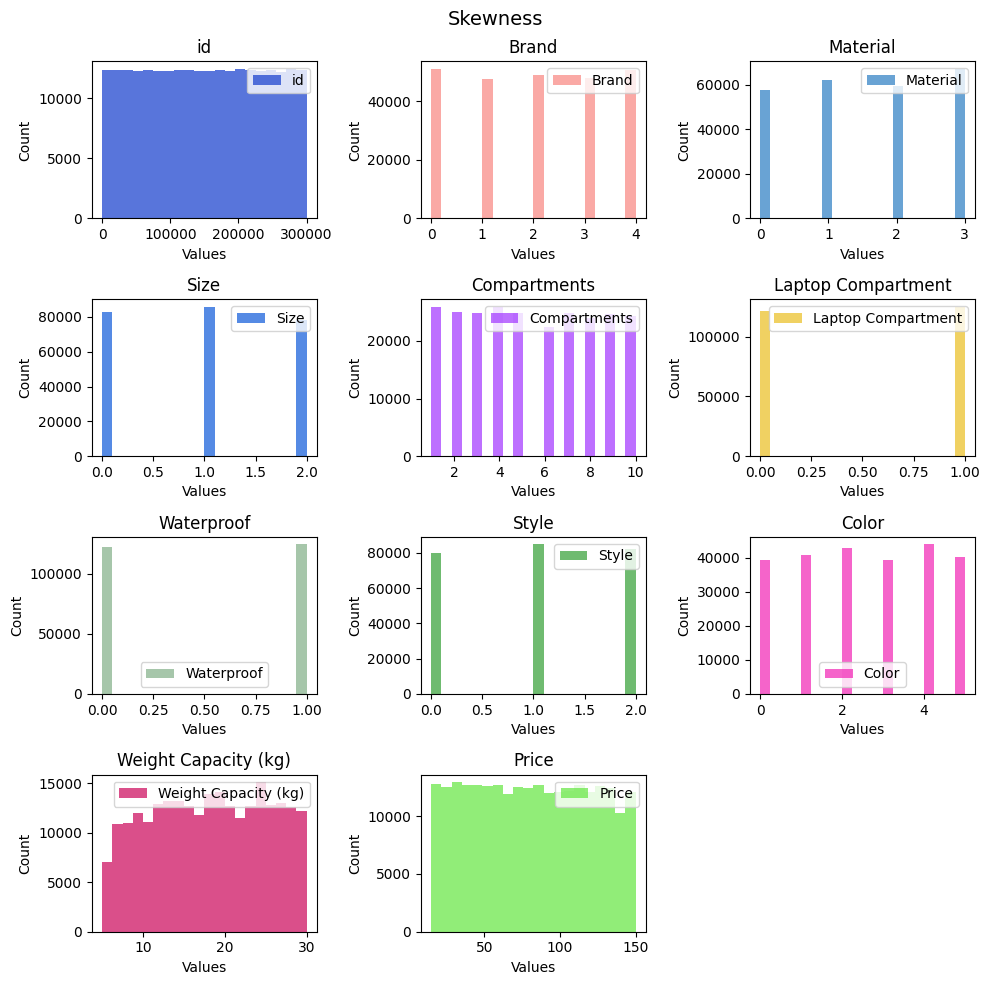

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

num_cols = len(train.columns)  # Get number of columns
rows = (num_cols + 2) // 3  # Adjust rows dynamically

for i, (name, data) in enumerate(train.items(), 1):
    plt.subplot(rows, 3, i)  # Adjust rows instead of fixing at 1 row
    plt.hist(data, bins=20, alpha=0.7, label=name, color=np.random.rand(3, ))
    plt.title(name)
    plt.xlabel("Values")  # Avoid using `data` as xlabel
    plt.ylabel("Count")
    plt.legend()

plt.suptitle("Skewness", fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
train.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [13]:
# Commented due to its long run time: 10 minutes
# train_np = train.to_numpy()
# no_missing_np = no_missing.to_numpy()
# missing = []
# for i in train_np:
#     if i[0] not in no_missing_np[:, 0]:
#         missing.append(i)
#
# missing

In [33]:
train = pd.read_csv("./inputs/train.csv")
# Find rows in df1 that are NOT in df2
diff_df1 = train[~train.apply(tuple, axis=1).isin(no_missing.apply(tuple, axis=1))]
diff_df1

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
5,5,Nike,Canvas,Medium,10.0,No,Yes,NaN,Black,7.241812,20.01553
6,6,Nike,NaN,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
10,10,Nike,Polyester,Large,1.0,Yes,No,Backpack,NaN,27.806951,68.31047
11,11,Nike,Polyester,NaN,10.0,No,No,NaN,Gray,13.697554,23.25963
21,21,Under Armour,Polyester,NaN,9.0,Yes,Yes,Messenger,Gray,11.219052,35.46348
...,...,...,...,...,...,...,...,...,...,...,...
299975,299975,Jansport,Leather,Medium,8.0,No,Yes,Messenger,NaN,20.355501,110.42196
299978,299978,NaN,Canvas,Large,6.0,Yes,No,Tote,Gray,5.000000,50.78781
299983,299983,Puma,Nylon,Large,9.0,Yes,Yes,NaN,Black,25.499734,54.18523
299989,299989,Nike,NaN,NaN,2.0,Yes,Yes,Messenger,Green,NaN,30.29751


In [34]:
# all_df_corrected.to_csv("./inputs/modified_train.csv", index=False)
no_missing.to_csv("./modified_inputs/no_missing_train.csv", index=False)